In [1]:
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt

from src.sdes import sde_kunita, sde_utils
import src.sdes.time as time

In [2]:
def x0(num_landmarks):
    x0_1 = jnp.linspace(0, 1, num_landmarks)
    x0_2 = jnp.zeros(num_landmarks)
    x0 = jnp.stack([x0_1, x0_2], axis=1).flatten()
    return x0

def sample_circle(num_landmarks: int, radius=1., centre=jnp.asarray([0, 0])) -> jnp.ndarray:
    theta = jnp.linspace(0, 2 * jnp.pi, num_landmarks, endpoint=False)
    x = jnp.cos(theta)
    y = jnp.sin(theta)
    return (radius * jnp.stack([x, y], axis=1) + centre).flatten()

lots_of_landmarks = 1000

x0_10 = sample_circle(5)
x0_lots = sample_circle(lots_of_landmarks)

num_trajs = 2

T = 1.
N = 100

keys = jax.random.split(jax.random.PRNGKey(0), num_trajs)

data_fn_lots = sde_kunita.data_forward(x0_lots, T, N)
_, trajs_lots, _ = data_fn_lots(keys)

data_fn_less = sde_kunita.data_forward(x0_10, T, N)
_, trajs_10, _ = data_fn_less(keys)



In [4]:
trajs_lots = trajs_lots.reshape(num_trajs, N, lots_of_landmarks, 2)
trajs_less = trajs_10.reshape(num_trajs, N, 5, 2)

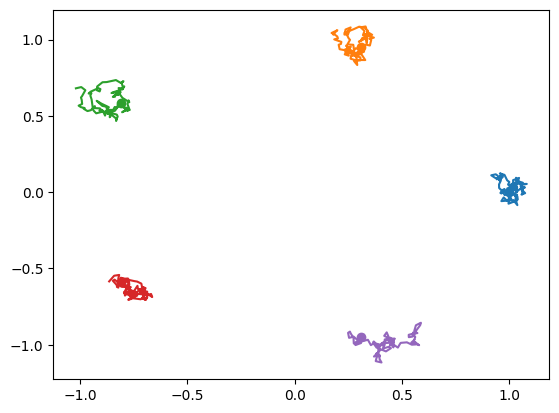

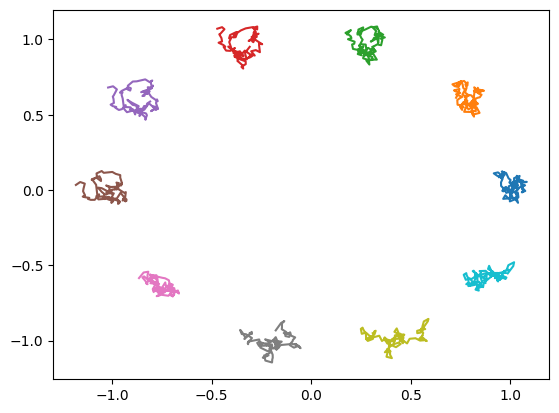

In [5]:
for landmark in jnp.arange(0, 5, 1):
    plt.plot(trajs_less[0, :, landmark, 0], trajs_less[0, :, landmark, 1])
    plt.scatter(trajs_less[0, 0, landmark, 0], trajs_less[0, 0, landmark, 1])
plt.show()

for landmark in jnp.arange(0, lots_of_landmarks, 100):
    plt.plot(trajs_lots[0, :, landmark, 0], trajs_lots[0, :, landmark, 1])
plt.show()


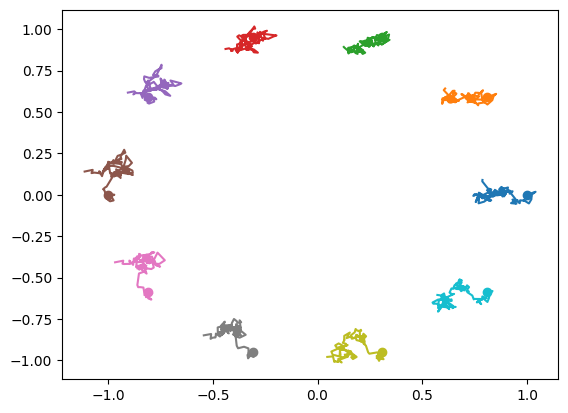

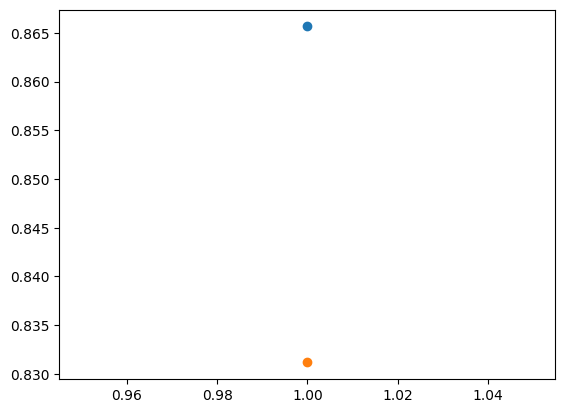

In [6]:
def x0(num_landmarks):
    x0_1 = jnp.linspace(0, 1, num_landmarks)
    x0_2 = jnp.zeros(num_landmarks)
    x0 = jnp.stack([x0_1, x0_2], axis=1).flatten()
    return x0

lots_of_landmarks = 100
x0_10 = sample_circle(10)
# x0_lots = sample_circle(lots_of_landmarks)

time_grid = time.grid(0, T, N)

data_fn_less = sde_kunita.data_reverse(x0_10, T, N)

ts, reverse, corr = data_fn_less(keys)

reverse = reverse.reshape(num_trajs, N, 10, 2)

for landmark in jnp.arange(0, 10, 1):
    plt.plot(reverse[0, :, landmark, 0], reverse[0, :, landmark, 1])
    plt.scatter(reverse[0, 0, landmark, 0], reverse[0, 0, landmark, 1])
    
plt.show()

for corr_ in corr:
    plt.scatter(1.0, corr_)

plt.show()

In [7]:
def x0(num_landmarks):
    x0_1 = jnp.linspace(0, 1, num_landmarks)
    x0_2 = jnp.zeros(num_landmarks)
    x0 = jnp.stack([x0_1, x0_2], axis=1).flatten()
    return x0

lots_of_landmarks = 100
x0_10 = sample_circle(10)
x0_lots = sample_circle(lots_of_landmarks)

time_grid = time.grid(0, T, N)
rev_drift, rev_diffusion = sde_kunita.vector_fields_reverse()

rev_trajs_10 = jax.vmap(sde_utils.solution, (0, None, None, None, None, None))(keys, time_grid, x0_10, rev_drift, rev_diffusion, (2*sde_kunita.GRID_SIZE**2,))
rev_trajs_lots = jax.vmap(sde_utils.solution, (0, None, None, None, None, None))(keys, time_grid, x0_lots, rev_drift, rev_diffusion, (2*sde_kunita.GRID_SIZE**2,))


In [8]:
rev_trajs_10 = rev_trajs_10.reshape(num_trajs, N, 10, 2)
rev_trajs_lots = rev_trajs_lots.reshape(num_trajs, N, lots_of_landmarks, 2)

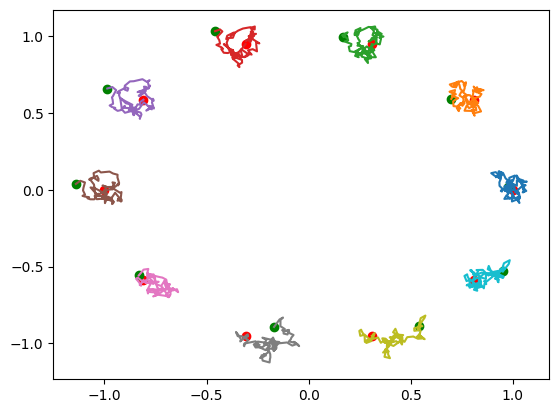

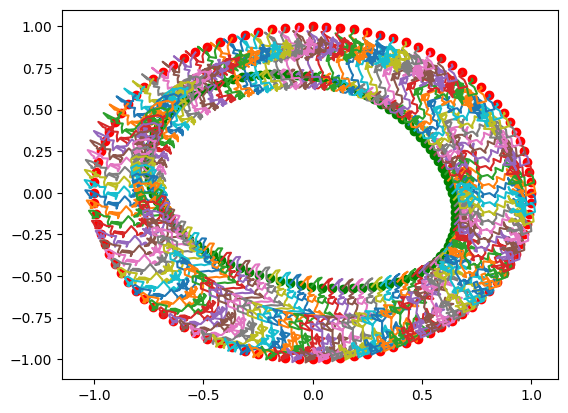

In [9]:
for landmark in jnp.arange(0, 10, 1):
    plt.plot(rev_trajs_10[0, :, landmark, 0], rev_trajs_10[0, :, landmark, 1])
    plt.scatter(rev_trajs_10[0, 0, landmark, 0], rev_trajs_10[0, 0, landmark, 1], c='r')
    plt.scatter(rev_trajs_10[0, -1, landmark, 0], rev_trajs_10[0, -1, landmark, 1], c='g')
plt.show()

for landmark in jnp.arange(0, lots_of_landmarks, 1):
    plt.plot(rev_trajs_lots[0, :, landmark, 0], rev_trajs_lots[0, :, landmark, 1])
    plt.scatter(rev_trajs_lots[0, 0, landmark, 0], rev_trajs_lots[0, 0, landmark, 1], c='r')
    plt.scatter(rev_trajs_lots[0, -1, landmark, 0], rev_trajs_lots[0, -1, landmark, 1], c='g')   
plt.show()
